<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/Chapters%20Notebooks/Fastai_Refresher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebooks will cover 4 chapters of the Fastai lectures. After 2 months of break and now I decided I have to go back and finish this book and take proper notes and use my skills in competition. 



In [1]:
# Installing fastai 
!pip install fastai --upgrade 

     |████████████████████████████████| 194kB 35.9MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
# Importing the needed libs 
from fastai import * 
from fastai.vision.all import *

# Under the hood: Training a Digit Training Classifier

In [3]:
# Reading the data
path = untar_data(URLs.MNIST_SAMPLE)
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [4]:
# Putting into sep variable of 3 and 7 
threes = (path / 'train' / '3').ls().sorted()
sevens = (path / 'train' / '7').ls().sorted()

threes[:5] , sevens[:5]

((#5) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png')],
 (#5) [Path('/root/.fastai/data/mnist_sample/train/7/10002.png'),Path('/root/.fastai/data/mnist_sample/train/7/1001.png'),Path('/root/.fastai/data/mnist_sample/train/7/10014.png'),Path('/root/.fastai/data/mnist_sample/train/7/10019.png'),Path('/root/.fastai/data/mnist_sample/train/7/10039.png')])

In [5]:
# Representing in a numpy array 
img_3 = threes[1]
im3 = Image.open(img_3)
im3.show()
np.array(im3)[4:10 , 4:10] # rows and columns 

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [6]:
# Stacking all the images in the directory, and converting into tensors

seven_tensor = [tensor(Image.open(o)) for o in sevens]
three_tensor = [tensor(Image.open(o)) for o in threes]

Calculate the average over all the images of the intensity of the pixel. 

Our tensors are in integers let's stack them and convert into float by dividing them by 255. 

In [7]:
stacked_sevens = torch.stack(seven_tensor).float() / 255
stacked_threes = torch.stack(three_tensor).float() / 255

stacked_sevens[:1]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
# Checking the shape 
stacked_sevens.shape , stacked_threes.shape

(torch.Size([6265, 28, 28]), torch.Size([6131, 28, 28]))

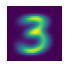

In [9]:
# Finding the ideal 3 by taking average along the 0th dimension
mean_3 = stacked_threes.mean(dim = 0)
mean_7 = stacked_sevens.mean(dim = 0)
show_image(mean_3)

Now we have two stuffs, one the ideal image and the actual image. We have to calculate the distance between them. 

- Mean absolute difference --> replaces negative with positive values
- Mean Squared Error --> makes everything positive. 

In [10]:
# Creating a vlid 3 and 7 tensors

valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path / 'valid' / '3').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path / 'valid' / '7').ls()])

# Converting them into 0 and 1 
valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = valid_7_tens.float() / 255 

# Shape of the valid tensors 
valid_3_tens.shape , valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [11]:
# Writing the function which cal dist btw ideal and arbitrary value
# taking the mean ranging over the values indexed by the last two axes of the tensors
def mnist_distance(a , b):
  return (a - b).abs().mean((-1 , -2))

# Using the function 
valid_3_dist = mnist_distance(valid_3_tens , mean_3)
valid_3_dist.shape 


torch.Size([1010])

In [12]:
# The first 5 sample's distance 
valid_3_dist[:5]

tensor([0.1463, 0.1076, 0.1296, 0.1369, 0.1445])

In [13]:
# Taking one sample from 3 and 7 
a_3 = stacked_threes[5]
a_7 = stacked_sevens[6]

len(a_3) , len(a_7)

(28, 28)

In [14]:
# Calculating the distance between ideal and single image file 
mnist_distance(a_3 , mean_3) , mnist_distance(a_7 , mean_7)

(tensor(0.1700), tensor(0.1542))

In [15]:
# Function to check whether a tensor is 3 or not 
def is_3(x):
  '''
  the distance should between the tensor and the mean 3 should be less than the mean 7, we can call it as a 3
  '''
  return mnist_distance(x , mean_3) < mnist_distance(x , mean_7)

# Passing one tensor 
is_3(a_3) # this is 3 and should return 3 

tensor(True)

In [16]:
# Passing our whole valid 3 set and see how it goes 
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [17]:
# Alright now calculate the distance for 3 and 7 
accuracy_3s = is_3(valid_3_tens).float().mean()

# For 7 we will take the inverse of all the 7s (since we don't have is_7 function)
accuracy_7s = (1 - (is_3(valid_7_tens).float().mean()))

accuracy_3s , accuracy_7s

(tensor(0.9168), tensor(0.9854))

In [18]:
# It will perform worse since it's 7 
is_3(valid_7_tens).float().mean()

tensor(0.0146)

## SGD 

- This is something that will allow our model to get better and better which gives the **ability of learning to the model**.

**How do we make it work?**
- Assign a weight 
- Tweak the weight (parameters) and improve based on the weight assignment.

**What can we do to our pixel similarity in order to apply SGD (or a optimizer)?**
- Assign a weight for each pixel values.



In [19]:
# Probability of a number being 8
def pr_eight(x , w):
  '''
  w = weights for the pixels 
  x = input image 
  '''
  return (x*w).sum()

The above function will help us to update the weight `w` for every iteration and make our weight assignemnt better and better. 

> Converting the above function `pr_8` to a machine learning classifier: 
- Initialize the weights 
- For each image, use the weights that was initialized and predict whether it appears to be a 3 or a 7. (Step 2)
- Based on the predictions, **calculate how good the model is** (*Calculte loss*). 
- Tweak (step) the weights based on the above calculation. 
- Go back again to Step 2, where you use the weights and make predictions. 
- Iterate this process until we decide to stop the training. 

#### Guidelines

- **Initialize**

    We initialize the parameters (or) weights to random values at first. It's believed starting with random weights (or) values works perfectly well. 

- **Loss**

    A function will return a number that is small when the performance of the model is good. The standard approach is to treat a **small loss as a good and large loss as bad.** 

- **Step**

    A simple way to figure out whether a weight should be increased a bit or decreased, would be just try to increase the **weight** by a small amount and observe the loss goes up or down. We do this **increment and decrement until we find an amount that satisfy us**. 

    However, we use calculus to take care of this. Finding which direction and roughly how much, to change each weight without doing those adjustments above. 

    We do this by calculating ***gradients.*** This is just an **performance optimization.**

- **Stop**

    This is the phase where we choose the epochs to train the model for, we would keep training until the accuracy of the model started getting worse or ran out of time.




#### Calculating Gradients 

In here we will use calculus as a performance optimizartion. 

**But why ?**
- It will help us quickly to calculate whether our loss will go up and down as we are adjusting the parameters.

> Gradients will tell us how much we have to change each weight to make our model better

**What the hell is a derivative?**
- it calculates the change of a equation rather a value.
- For instance, the derivative of the quadratic function at the value 3 tells us how rapidly the function changes at the value 3. 

**Exact definition of a gradient**

*Gradient is defined as rise/run that is the change in the value of the function, divided by the change in the value of the parameter.*

The takeaway: 
- When we know how our function would change, then we know what we need to do in order to make it smaller (loss function). 
- The key is having a function and change the parameter of the function to make the loss smaller. 

#### Things to know

- The function will return not one but alot of weights, so when we calculate the derivative we will get alots of number, `i.e gradient for every weight`. 
- `requires_grad_()` special method tells pytorch we want to calculate gradients w.r.t to the variable at the value. For instance, in 3x (x). By doing this Pytorch, will keep track of all the computed gradients. 
- `backward` --> backpropagation, this is process of calculating the derivative (gradients) for each layer. 
- In `backward pass` we calculate the gradients of a neural network, and on `forward pass` we calculate the activations of a neural net.

> **Backpropagation** is a training algorithm consisting of 2 steps: 
1. Feed forward the values 
2. Calculate the error and propagate it back to the earlier layers. So to be precise, forward-propagation is part of the backpropagation algorithm but comes before back-propagating.


- https://datascience.stackexchange.com/questions/66416/forward-pass-vs-backward-pass-vs-backpropagation
- https://stackoverflow.com/questions/28403782/what-is-the-difference-between-back-propagation-and-feed-forward-neural-network


In [20]:
# Calculating Gradients with Pytorch

import torch 

# Creating a tensor (will keep track of the gradients of the value
xt = tensor(8.).requires_grad_()

# Sample function 
def f(x): return x**2

# Performing some computations with xt
yt = f(xt)
yt

tensor(64., grad_fn=<PowBackward0>)

In [21]:
# Telling pytoch to calculate the gradients by calling grad 
yt.backward() # always pass a function

In [22]:
# Now viewing the gradients calculated on our variable 
xt.grad # now get the gradient on a variable

tensor(16.)

The graidents will tell us only the slope of our function, they don't really say how far we should adjust the parameters. 

https://en.wikipedia.org/wiki/Slope#Calculus

- If slope is very large --> More adjustments to do 
- If slope is very small --> We are close to the optimal value. 

### Stepping (way to increase/decrease weight) with a Learning Rate 
- This is the idea of **multiplying the gradient by a small number** (that is the learning rate).
- We can adjust the learning rate by, `w- = w.grad * lr`. 

This means we get the gradients and multiply the gradients with a learning rate. 

- If the learning rate is too low, optimization will take a lot of time because steps towards the minimum of the loss function are tiny.
- If the learning rate is too high, it can result in getting the *loss* worse. Rather than diverging (or) converging it will bounce around. 
https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0

### An End-to-End SGD Example 



In [23]:
# Time 
time = torch.arange(0 , 20).float()
# Time in seconds 
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

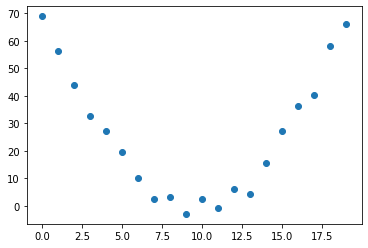

In [24]:
# Calculating the speed -> a*(t**2) + (b*t) + c
speed = torch.randn(20)*3 + 0.75*(time -9.5)**2 + 1

# Plotting the time and speed
plt.scatter(time , speed)

In [25]:
def f(t , params):
  a , b , c = params
  return a*(t**2) + (b*t) + c

Every quadratic function returns 3 values a, b and c. 

In [26]:
# Since we're on a continous data our loss function would be mse
def mse(preds , targs):
  return ((preds - targs)**2).mean()

In [27]:
# Firstly --> Initialize the parameters
params = torch.randn(3).requires_grad_()
params # a b c

tensor([-0.5001,  2.1045, -1.5208], requires_grad=True)

In [28]:
# Calculating the predictions 
preds = f(time , params)
preds

tensor([-1.5208e+00,  8.3583e-02,  6.8770e-01,  2.9160e-01, -1.1047e+00,
        -3.5013e+00, -6.8980e+00, -1.1295e+01, -1.6692e+01, -2.3090e+01,
        -3.0487e+01, -3.8885e+01, -4.8283e+01, -5.8682e+01, -7.0080e+01,
        -8.2479e+01, -9.5878e+01, -1.1028e+02, -1.2568e+02, -1.4208e+02],
       grad_fn=<AddBackward0>)

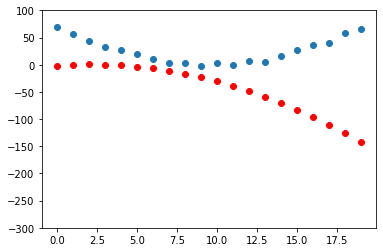

In [29]:
# A function to plot both targets and preds to see how close our predictins are

def show_preds(preds , ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time , speed)
  ax.scatter(time , to_np(preds) , color='red')
  ax.set_ylim(-300 , 100)

show_preds(preds)

In [30]:
# Now the next step --> Calculate the loss
loss = mse(preds , speed)
loss

tensor(7994.6719, grad_fn=<MeanBackward0>)

In [31]:
# Calculating the gradients (from the loss function)
loss.backward()
params.grad # for a,b,c we get the gradients

tensor([-28578.9531,  -1801.7977,   -138.3272])

In [32]:
# Just multiplying lr with gradients 
params.grad * 1e-5

tensor([-0.2858, -0.0180, -0.0014])

In [33]:
# Stepping --> update the gradients with a learnin rate 
lr = 1e-5 # learning rate 

# Functionality that's help us in updating the learning rate 
params.data -= lr * params.grad.data
params.grad = None



In [34]:
# Putting everything into a function 
def apply_step(params , prn = True):
  # Getting the predictions 
  preds = f(time , params)
  # Calculate the loss 
  loss = mse(preds , speed)
  # Initiating back prop on loss function 
  loss.backward()
  # Stepping with a learning rate (multiplying the gradients with a lr)
  params.data -= lr * params.grad.data
  params.grad = None
  if prn:
    # Getting only the numbers (we don't want the tensors)
    print(loss.item())
  return preds


In [35]:
# Iterating 
for i in range(10):
  apply_step(params)

2110.98291015625
997.5989990234375
786.9031372070312
747.0232543945312
739.4669189453125
738.02734375
737.7452392578125
737.68212890625
737.660400390625
737.6466064453125


#### Summarizing Gradient Descent

- At beginning, the weights of our model can be random (or) from pre-trained model.
- We compare the model with our targets and prediction using a **loss function,** which returns a number that we want to make as low as possible by **improving our weights.**
- To find how to change the **weights** to make the loss a bit better, we use calculus to **calculate the gradients.**
- Calculating gradients is similar finding a steepest downward slope, we use the **magnitude of the gradient** (steepness of a slope) to tell us how big a step to take.
- To decide on the step size, we multiply the gradient by a number we choose called the **learning rate.**
- We then iterate until we have reached the lower point, and then stop.

In [36]:
# Changing them from a list of matrices (rank 3) to a list of vectors (rank 2)

train_x = torch.cat([stacked_threes , stacked_sevens]).view(-1 , 28*28)
train_x.shape

torch.Size([12396, 784])

>`-1` —> denotes the row, since we don't know how many rows exactly in a dataset (or) this image, we use -1. Which says make this axis as big as necessary to fit all the data. Like we do in slicing!

In [37]:
# Constructing our labels (3s -> 1 & 7s -> 0s)

train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
train_y.shape

torch.Size([12396, 1])

In [38]:
# Zipping x and y into a dataset 
dset = list(zip(train_x , train_y))
x , y = dset[0] # take one sample

# Checking the shape 
x.shape , y.shape

(torch.Size([784]), torch.Size([1]))

In [39]:
# x and y 

print(f'Images in Tensor (sliced) : {x[0 : 100]}')
print('----------------- ------------ --------- -------')
print(f'Labels: {y}')

Images in Tensor (sliced) : tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])
----------------- ------------ --------- -------
Labels: tensor([1])


In [40]:
# Doing the exact thing for our validation set 

valid_x = torch.cat([valid_3_tens , valid_7_tens]).view(-1 , 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

# Putting them into a dataset 
valid_dset = list(zip(valid_x , valid_y))

**Initialize the parameters with random numbers**

In [41]:
# Generate weight for every pixel 
def init_params(size , std = 1.0):
  return (torch.randn(size) * std).requires_grad_()



In [42]:
# Using the function and creating random weights 
weights = init_params(size = (28*28 , 1) , std=1.0)
weights.shape

torch.Size([784, 1])

In [43]:
# Initializing bias 

bias = init_params(1)

In [44]:
# Prediction on one image 
(train_x[0] * weights.T).sum() + bias


tensor([-3.1123], grad_fn=<AddBackward0>)

Alright so far we have made a initializer function that gives us random weights, we got: 
- Function to calculate the predictions

In [45]:
# Constructing the matrix multiplication function (y = wx + b)

# As we can say our tiny model indeed 
def linear1(xb):
  '''
  xb --> Input training batch

  We return by multiplying the weights to our each input mini-batch
  '''
  return xb@weights + bias

# Getting the predictions for all images in the training set (x)
preds = linear1(train_x)
preds[:10]

tensor([[-3.1123],
        [-5.3769],
        [-8.9940],
        [-9.9338],
        [ 3.1794],
        [10.3837],
        [-2.1776],
        [ 6.4215],
        [-5.3547],
        [-6.0647]], grad_fn=<SliceBackward>)

Looking back before jumping into calculus and other stuffs first we make a prediction on our input data, then observe how the model/function performs? Not well? 

Alright we will decide that by passing the preds and targs into a loss function. And we know our goal is to minimize the loss so now we we will get the help of calculus (gradients) that will help our loss function to find the minimum. 



In [46]:
# Calculating the accuracy
corrects = (preds > 0.0).float() == train_y

In [47]:
# Manually tweaking one value of the weight matrix 
with torch.no_grad():
  weights[0] *= 1.001


Making a change with just `weights[0] *=1.001` throws an error, this is because we are trying to access even the graidents and make a change in that. 

By using with `torch.no_grad()` we can turn of the gradients and make computations just on the value of the matrices. 

https://datascience.stackexchange.com/questions/32651/what-is-the-use-of-torch-no-grad-in-pytorch

Gradients tells the loss function how to make changes in order to tweak the weights. 



 

Reads: 
- https://discuss.pytorch.org/t/what-is-the-purpose-of-is-leaf/87000/5
- https://stackoverflow.com/questions/57188409/assigning-a-parameter-to-the-gpu-sets-is-leaf-as-false
- https://forums.fast.ai/t/weights-0-in-place-operations/89308



In [48]:
# Making the prediction after manually tweaking the value 
preds = linear1(train_x)

((preds > 0.0).float() == train_y).float().mean().item()

0.37737980484962463

If we are going to use accuracy as an performance metric the slight changes in the weight won't make a difference in the loss function. 

So we need a metrics where little changes on the weight matrice should make a impact on the loss function. 

> We need a loss function that when our weights result in slightly better predictions, gives us a slightly better loss.

The only thing our model will do is, given a number predicts it whether an 3 or not. if it's not 3 then it has to be 7. 




In [49]:
# Calculating the loss 
trgts = tensor([1 , 0 , 1])
prds = tensor([0.9 , 0.4 , 0.2])

# Creating our own loss function 
def mnist_loss(predictions , targets):
  return torch.where(targets == 1 , 1 - predictions , predictions).mean()

In [50]:
mnist_loss(prds , trgts)

tensor(0.4333)

In [51]:
# Importing utils from the fastbook 

!pip install -q fastbook 
from fastbook import *

     |████████████████████████████████| 727kB 36.1MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 1.2MB 51.7MB/s 
     |████████████████████████████████| 61kB 10.2MB/s 


/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /pytorch/aten/src/ATen/native/RangeFactories.cpp:25.)
  x = torch.linspace(min,max)


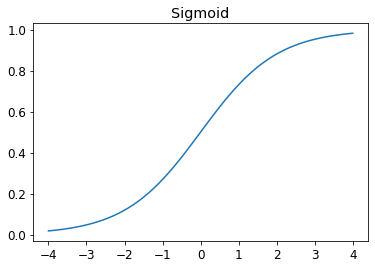

In [52]:
# Example of sigmoid from Pytorch function

plot_function(torch.sigmoid , title='Sigmoid' , min=-4 , max=4)

Sigmoid function squeezes the values between the range 0 and 1.

In [53]:
# Updating our above mnist_loss with a sigmoid function 
def mnist_loss(predictions, targets):
  return torch.where(targets == 1 , 1-predictions ,predictions).mean()

metric --> For human understanding 
loss --> For automatic updation (machine's metric to improve the performance of our model)

The loss function is calculated for each item in our dataset, and then at the end of an epoch, the loss values are all averaged and the overall mean is reported for the epoch.

Metrics on other hand are the numbers we care about and these are the values which are printed at end of each epoch that tells us how our model is doing.


### SGD and Mini-Batches 

Now in here we will try to automate most of the parts. 

- Batching a handful items into a seperate mini-batches and making computations on those mini-batches rather than computing on the whole dataset / items.
-Choosing a good batch size is one of the decisions one need to make a deep learning practitioner to train the model quickly and accurately.
- The important reason for having mini-batches is it could run on GPU, so the computations takes place even more faster. 


Before putting our data into batches, 
- We gotta randomly shuffle the data. 


- it prevents any bias during the training
- it prevents the model from learning the order of the training
- it helps the training converge fast

https://stats.stackexchange.com/questions/245502/why-should-we-shuffle-data-while-training-a-neural-network






#### DataLoader

A `DataLoader` can take any Python collection and turn it into a iterator (generator) over many batches. 

In [54]:
# Sample DataLoader 

coll = range(20) 
dls = DataLoader(coll , batch_size = 5 , shuffle = True)
list(dls)

[tensor([ 7, 17,  5,  9, 15]),
 tensor([19, 11, 10, 13,  2]),
 tensor([12,  0, 18, 16,  3]),
 tensor([ 1,  4,  6, 14,  8])]

`Dataset` --> Contains collection of both independent and dependent variable. 

In [55]:
# Example of Dataset 
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In practice, we pass a `Dataset` to a `DataLoader` and it returns batches of independent and dependent variables.

### Putting it all together 

- Initialize the parameters 
- Making a prediction 
- Depending upon my prediction, will calculate my loss function.
- Call our good friend gradients, activate the gradients of our weights. Gradients helps in updating the parameters.
- We are going to perform to step, where we will multiply our learning with our weight gradients. 
- We will train this for our desired epochs. 


In [56]:
# re-initializing the parameters 
weights = init_params((28*28 , 1))
bias = init_params(1)


In [57]:
# Constructing our DataLoader 
dl = DataLoader(dset , batch_size= 256)
# Slicing off first mini-batch
xb , yb = first(dl)

# Checking the shape 
xb.shape , yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [58]:
# Doing the same for validaton set 
valid_dl = DataLoader(valid_dset , batch_size = 256)

In [59]:
# Create the mini-batch of size 4 
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [60]:
# Making predictions on our sample batch 
preds = linear1(batch)
preds


tensor([[  1.1245],
        [ -0.6244],
        [ -1.7694],
        [-12.7221]], grad_fn=<AddBackward0>)

In [61]:
# Labels 
train_y[:4]

tensor([[1],
        [1],
        [1],
        [1]])

In [62]:
# Calculating the loss 
loss = mnist_loss(preds , train_y[:4])
loss 

tensor(4.4978, grad_fn=<MeanBackward0>)

In [63]:
# Now calculating the gradients 
loss.backward()
print(f'Shape of weight calculated: {weights.grad.shape}')
print(f'Turning into a single tensor: {weights.grad.mean()}')
print(f'Bias: {bias.grad}')

Shape of weight calculated: torch.Size([784, 1])
Turning into a single tensor: -0.15112045407295227
Bias: tensor([-1.])


In [64]:
# Putting altogether in a function 
def calc_grad(xb , yb , model):
  '''
  xb --> mini-batched training set 
  yb --> mini-batched test set 
  model --> the model we want to use 
  '''
  # Making a prediction 
  preds = model(xb) 
  # Calculating the loss
  loss = mnist_loss(preds , yb)
  # Activating the gradients (for updating our weights)
  loss.backward() 
  


In [65]:
# Testing the above function 
calc_grad(batch , train_y[:4] , linear1)

# Below are the weights and biases after calculating the gradients above 
weights.grad.mean() , bias.grad

(tensor(-0.3022), tensor([-2.]))

In [66]:
# Calling it another time
calc_grad(batch , train_y[:4] , linear1)

# Below are wts and biases
weights.grad.mean() , bias.grad

(tensor(-0.4534), tensor([-3.]))

In [67]:
# Making the gradients to zero, so it won't affect the previous computer gradients 
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

In [68]:
# Now it won't add with the previous gradients (because we set it to zero)
# Calling it another time
calc_grad(batch , train_y[:4] , linear1)

# Below are wts and biases
weights.grad.mean() , bias.grad

(tensor(-0.1511), tensor([-1.]))

Awesome! So we have one remaining step, that is to update the weights and biases (parameters) on the gradient and the learnin rate. 

We set the gradients to zero to avoid the confusion when we try to compute the derivative to the next batch. 

It's time now to calculate the accuracy, to decide if an output represent a 3 or 7,
- if it's greater than 0, then it's 7 
- if it's less than 0, then it's 3 

Now the updated function trains a model with the learning rate. 

In [69]:
# It will have a step function and runs for one epoch 
def train_epoch(model , lr , params):
  # Training loop
  for xb , yb in dl:
    calc_grad(xb , yb , model)
    for p in params:
      p.data  -= p.grad*lr
      p.grad.zero_()

Important Links 
- https://discuss.pytorch.org/t/when-grad-is-none/4466
- https://forums.fast.ai/t/autograd-does-not-appear-to-be-setting-gradient-lesson-4-04-mnist-basics-ipynb/82358

In [70]:
#train_epoch(linear1 , lr , params)

In [71]:
(preds > 0.0).float() == train_y[:4]

tensor([[ True],
        [False],
        [False],
        [False]])

Now we are creating a function that would calculate the accuracy from our x and y data batches. 

In [72]:
# Function to calculate the accuracy 
def batch_accuracy(xb , yb):
  '''
  xb --> input data with multiplied weights [model(xb)] 
  yb --> targets
  '''
  preds = xb.sigmoid()
  # Returns True (or) False
  correct = (preds > 0.5) == yb
  # Converting into 0s and 1s
  return correct.float().mean()

In [73]:
# Using the above function we've made 
print(f'We got the accuracy of: {batch_accuracy(linear1(batch) , train_y[:4])}')

We got the accuracy of: 0.25


Great our function works, to make it more sense let's make our model to make predictions on a validation set and calculate accuracy from there. 

In [74]:
# Calculate accuracy on our validation set 
def validate_epoch(model):
  '''
  model --> Input your model (linear1)
  This function will calculate the accuracy on a validation dataloader 
  '''
  accs = [batch_accuracy(model(xb) , yb) for xb , yb in valid_dl]
  return round(torch.stack(accs).mean().item() , 4)

In [75]:
ac = [batch_accuracy(linear1(batch) , train_y[:4]) for xb , yb in valid_dl]
ac

[tensor(0.2500),
 tensor(0.2500),
 tensor(0.2500),
 tensor(0.2500),
 tensor(0.2500),
 tensor(0.2500),
 tensor(0.2500),
 tensor(0.2500)]

In [76]:
round(torch.stack(ac).mean().item() , 4)

0.25

In [77]:
# Testing the above function                                                         
validate_epoch(linear1)


0.516

In [78]:
def init_params(size, variance=1.0): 
  return (torch.randn(size, dtype=torch.float)*variance).requires_grad_()

weights = init_params(size = ((28*28) ,1))
bias = init_params(1)
weights.shape , bias.shape



(torch.Size([784, 1]), torch.Size([1]))

In [79]:
# Setting up the hyperparameters (testing for one epoch)
params = weights,bias
lr = 4e-3
train_epoch(linear1 , lr , params)
validate_epoch(linear1)

0.7682

In [80]:
# Using both functions and training our model for 10 epochs 
for i in range(10):
  train_epoch(linear1 , lr , params)
  print(f'The accuracy is: {validate_epoch(linear1)}\n')

The accuracy is: 0.8109

The accuracy is: 0.8349

The accuracy is: 0.8545

The accuracy is: 0.8688

The accuracy is: 0.8815

The accuracy is: 0.8888

The accuracy is: 0.8982

The accuracy is: 0.906

The accuracy is: 0.909

The accuracy is: 0.9164



### Creating an Optimizer
So now we will use the power of the optimizer and get rid of two steps that is, 
- Initializing the parameters 
- Calculating gradients 




In [81]:
# Creating the parametes by using pytorch's module
import torch 
linear_model = nn.Linear((28*28) , 1)

In [82]:
# Unpacking weights and biases 
w , b = linear_model.parameters()
w.shape , b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [83]:
print(f'For Pytorch model the weights are : {w.shape}')
print(f'For Pytorch model the bias are :{b.shape}')

print('-------------------------  --------------------------')

print(f'For our model the weights are :{weights.shape}')
print(f'For our model the weights are :{bias.shape}')

For Pytorch model the weights are : torch.Size([1, 784])
For Pytorch model the bias are :torch.Size([1])
-------------------------  --------------------------
For our model the weights are :torch.Size([784, 1])
For our model the weights are :torch.Size([1])


> Setting the `p.grad = None` is gonna return 0 because there is no Null or None in C ++. 

In [84]:
# Creating an SGD optimizer
lr = 1.
opt = torch.optim.SGD(params = linear_model.parameters() ,
                      lr = lr)

In [85]:
def train_epoch(model):
  for xb , yb in dl:
    calc_grad(xb , yb , model)
    opt.step()
    opt.zero_grad()

In [86]:
# Creating the train_model function 
def train_model(model , epochs):
  for i in range(epochs):
    train_epoch(model)
    print(f'The accuracy is: {validate_epoch(model)}\n')

In [87]:
train_model(linear_model , 20)

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533

The accuracy is: 0.9533



Awesome so far, we managed to automate some of the stuffs we have been doing with the help of Pytorch. 

Now to automate the training process we are going to use Fastai's `Learner` class (train_model) 

To create a `Learner` we need a `DataLoaders`, and the `DataLoaders` containts both train and validation Dataloader. 

- `DataLoader` --> Create batches of the data and shuffles it. 
- `DataLoaders` --> Combines two DataLoader into one whole. 

**`Learner`** takes, 
- a `DataLoaders`
- the model 
- optimization function 
- Loss function 
- metrics 

Important Links:
- https://forums.fast.ai/t/core-usage-of-datablock-and-dataloader/69051/2
- https://forums.fast.ai/t/combining-dataloaders/79549
- https://forums.fast.ai/t/custom-dataset-and-dataloader-for-learner/81408

In [88]:
# Creating our DataLoaders 
dls = DataLoaders(dl , valid_dl)


In [89]:
# Creating a learner 
learn = Learner(dls , 
                model = nn.Linear(28*28 , 1) , 
                opt_func = SGD, 
                loss_func = mnist_loss , 
                metrics = batch_accuracy)

In [90]:
# Now training our learner for 10 epochs 
lr = 1e-4
learn.fit(10 , lr = lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.475561,0.546993,0.398430,00:00
1,0.452924,0.513362,0.466143,00:00
2,0.426785,0.479730,0.537291,00:00
3,0.398360,0.446098,0.574092,00:00
4,0.368617,0.412467,0.629048,00:00
5,0.338184,0.378835,0.673700,00:00
6,0.307413,0.345203,0.704122,00:00
7,0.276487,0.311572,0.733562,00:00
8,0.245490,0.277940,0.769382,00:00
9,0.214463,0.244308,0.801766,00:00


### Adding a Non-linearity 

So far we've been dealing with a simple linear classifier, but now we need something a bit more flexible enough to learn patterns in a complex task. 

In [91]:
# Constructing a basic neural net 
def simple_net(xb):
  # Linear function
  res = xb@w1 + b1 
  # Relu function
  res = res.max(tensor(0.0))
  # Linear function 
  res = res@w2 + b2
  return res


In [92]:
# Now we gotta initialize the parameters 
w1 = init_params((28 * 28) , 30)
w2 = init_params(30 , 1)
b1 = init_params(30)
b2 = init_params(1)

In the above, `w1` has 30 output activations which means `w2` must have 30 input activations, so they match.

The function `res.max(tensor(0.0))` is called as rectified linear unit, also known as `ReLU`. All it does is replace negative number with a zero. We can use it by `F.relu` in Pytorch.

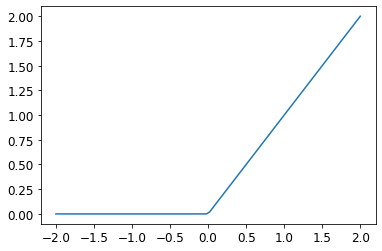

In [93]:
# Plotting a relu function 
plot_function(F.relu)

#### Why there is a need for non-linear layers? 

- There is no use of stacking up more linear layer on after another. 
- Non-linear layers enables neural nets to learn making conditional decisions for controlling the computational flow. 

Important Links: 
- https://medium.com/swlh/why-are-neural-nets-non-linear-a46756c2d67f
- https://forums.fast.ai/t/linear-vs-non-linear/1854


In [94]:
# Using Pytorch writing a simple_net function 

simple_net = nn.Sequential(
    nn.Linear(28*28 , 30), 
    nn.ReLU(), 
    nn.Linear(30 , 1)
)

The three lines of code that we have here are known as layers. 

The first and third layer known as **linear layers** and the 2nd layer known as **nonlinearity (or) activation function**

Since `nn.Sequential` is a module, we can peek in the parameters of all modules it contains.

And its a deeper model than we trained on before, so we will lower the learning rate and use few more epochs to balance.



In [95]:
# Using our simple net model 
learn = Learner(dls , simple_net , 
                opt_func = Adam ,
                loss_func = mnist_loss , 
                metrics = batch_accuracy)

# Training for 20 epochs 
learn.fit(20 , 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,2429.405762,-1554.655884,0.495584,00:00
1,-101.958817,-6644.120117,0.495584,00:00
2,-4016.786133,-22702.837891,0.495584,00:00
3,-13417.467773,-52076.718750,0.495584,00:00
4,-30203.064453,-91281.671875,0.495584,00:00
5,-53605.371094,-136969.765625,0.495584,00:00
6,-82107.023438,-186670.140625,0.495584,00:00
7,-114123.039062,-238694.250000,0.495584,00:00
8,-148376.375000,-291907.156250,0.495584,00:00
9,-183926.953125,-345518.593750,0.495584,00:00


About Deeper model

For deeper model we don't need to use many parameters, it turns out that we can use smaller matrices, with more layers and get better results than we would get with larger matrices with just few layers.

Neural network contains a lot of numbers, but they are only two types of numbers that are calculated and the parameters that these numbers are calculated from.

**Activations**

Numbers that are calculated both by linear and non - linearity.

**Parameters**

Numbers that are randomly initialized and optimized ( numbers that define the model).

Part of becoming a good deep learning practitioner is getting used to the idea of looking at your activations and parameters, and plotting them and testing whether they are behaving correctly.

# Image Classification 

In previous lecture we peeked under the hood, but the important thing is to make our model perform really well. 

To to do this we should be able to look inside the neural network as it trains and make predictions, find possile problems and know how to fix them. 

In this chapter will dive deep into: 
- Architecture of computer vision model , NLP , tabular model.
- how to create arch that matches the needs of our particular domain.
- how to get the best possible results from the training process.
- and how to make things faster
- what changes we gotta make as the datasets change etc...

Well to work out the things, we gotta learn the pieces of deep learning puzzle, which includes:

- Types of layers
- Regularization methods
- optimizers
- how to put layers together into architectures
- labelling techniques etc...

**Data is usually provided in one of these 2 ways:**

- Individual files representing items of data, such as text docs or images which are **organized into folders or with filenames** representing info about those items.
- A table of data (e.g CSV format) in which **each row is an item** and may include **filenames providing connections data in the table and data in other formats**, such as text or images.

Well this dataset provides us with `images` and `annotations`, the **annotation library** --> contains information where the pets are.

- **classification** --> what the pets are
- **localization** --> where the pets are

In [96]:
# Importing the things we need 
import fastai 
from fastai.vision.all import * 
from fastai import * 
print(fastai.__version__)

2.4


In [97]:
# Getting our data
path = untar_data(URLs.PETS)
path.ls() 

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [98]:
# Looking into the image directory 
(path / 'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/pug_132.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_128.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_30.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_52.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_129.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_86.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_42.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_183.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_38.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_64.jpg')...]

In [99]:
# How does one filename looks like 
fname = (path / 'images').ls()[0]
fname

Path('/root/.fastai/data/oxford-iiit-pet/images/pug_132.jpg')

We gotta extract our label from the filepath itself, and to do these kinda tools we use the tool called regular expression, also known as **regex**. 



In [100]:
# Using regular expression on one filename 
re.findall(r'(.+)_\d+.jpg$', fname.name)

['pug']

It plucks out all the character leading upto the last underscore character, as long as the subsequent characters are numerical digits and then the JPEG file extension.

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


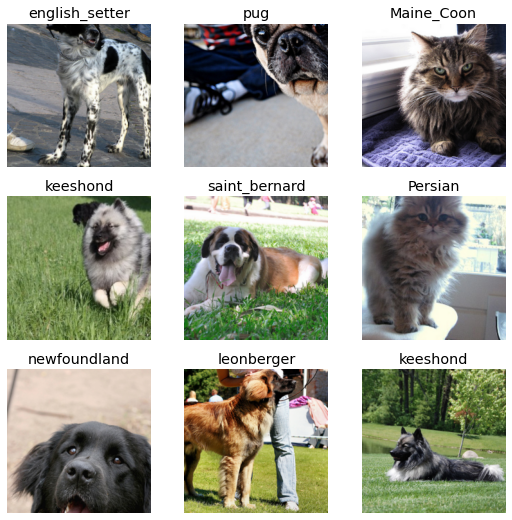

In [101]:
# Building a DataBlock 
pets = DataBlock(blocks = (ImageBlock , CategoryBlock), 
                 get_items = get_image_files , 
                 splitter = RandomSplitter(seed = 42) , 
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$') , 'name'), 
                 item_tfms = Resize(460), 
                 batch_tfms = aug_transforms(size = 224 , min_scale= 0.75))

# Putting the datablock into a dataloaders 
dls = pets.dataloaders(path/'images')

# Show batch 
dls.show_batch()

We should pay attention to below important steps, this is a data augmentation strategy called as **presizing** 

The reason for using presizing is to minimize the data destruction while maintaining good performance. 

### Presizing 
> While applying data augmentation in common we have to worry about two things: 
- Make sure all images have same dimensions, so they can collate into tensors to be passed into the GPU. 
- Another thing would be is to, minimize the number of computations processed whenever we perform augmentations. 

Well to get the above thing working properly, we gotta **reduce the number of computations** and **number of loss operations** wherever possible and transform the images into **uniform sizes** to process in the GPU. 

**Why traditional method of augmentation fails ?**
- While applying the **augmentation**, it might introduce **spurious empty zones and degrade the data or even both**. 
- For instance, if we're to rotate the image by **45 degrees will damage the pixels** and creates bounds with emptiness.
- Many **rotations and zooming** requires change in the pixels (interpolation) and these changes are derived from the original image of lower quality.

> Data augmentation makes the changes right in the pixel of the original image. To overcome this loss due to this and make it more efficient we use **presizing**. 

**Presizing mechanism**

Here the image has been zoomed and rotated as one operation and then interpolated only once, and the best thing is everything happens all at once in GPU and reduce the number of lossy operations due to augmentation (loss of pixels).

We find that in practice using presizing significantly improves the accuracy of models, and often results in speedups too.

#### **Strategies of Presizing**

- Resize the original image to relatively larger dimensions(460). 
- Now composing all the augmentation operations `--> Resize --> min_scale` into one **whole operation and perform this on GPU** on the flow once at the end of processing, rather than performing the operations individually and interpolating multiple times without affecting the quality of original image.

**Breaking down the code**
- `item_tfms = Resize(460)` --> Resizing the images large enough that they have space margin to allow further augmenttions on the inner regions without creating empty zones.

- `batch_tfms = aug_transforms(size = 224 , min_scale=0.75)` --> In here, the GPU is used for the data augmentation and all those transforms and operationn are done together.

- `min_scale = 0.75` --> **RandomResizedCrop** applies on a batch (batch transform)

On the training set, the area for cropping is chosen randomly and crop size is selected to cover up the entire height and width of the image. 

Also batching goes in here on the training set, the **random crop and augmentation are done first** whereas in the validation set, only resize to the finale size (224) is needed. 


Important links: 
- https://www.kdnuggets.com/2019/05/boost-your-image-classification-model.html



In [102]:
# Debugging a datablock with summary method 
pets.summary(path / 'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Birman_51.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x451
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Birman_51.jpg
    applying partial gives
      Birman
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(2)

Final sample: (PILImage mode=RGB size=500x451, TensorCategory(2))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Re

The above summary explains how exactly our DataBlock was built. 

It provides alot of details, if it fails we can figure at exactly which point the error happens like the library will help us.

If we made a mistake while building a DataBlock, we won't likely see it before this step. We can use the summary method of DataBlock class, it creates a batch from the source (path / 'images') we give it.


**Train a simple data** 

- Once we found out how our data looks, the first and **best way to test is train with a simple model**.
- Don't fit your model in a huge (or) sota model at first it's time consuming. 
- Knowing your **baseline results** helps in choosing what's next, and even **brings in clarity what went wrong**.



In [103]:
# Training a simple model to train our data 

learn = cnn_learner(dls , resnet18 , metrics = error_rate)
learn.fine_tune(2)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.614818,0.385055,0.134641,01:00


epoch,train_loss,valid_loss,error_rate,time
0,0.573611,0.292062,0.092016,01:03
1,0.376482,0.258900,0.087957,01:03


#### Decoding the fit function
- `epoch`--> an one epoch is a complete pass through of all the images in the data. Letting our model to look at our data once per epoch. 
- `train_loss` --> average loss over the items in a training set. 
- `valid_loss` --> average loss over the items in the validation set. 
- `error_rate` --> is a metric which gives the error rate, how wrong our model is. 
- `loss` --> a function we choose to **optimize the parameters** (SGD , Adam....) 

In our case we didn't set a loss function and fastai chooses a default one, generally try to select an appropriate loss function based on the kind of data and model we are using.

In here the default loss function is `cross_entropy` loss. 

In the next section will unravel how a Cross Entropy loss works. 



### Cross-Entropy Loss 
Like the `mnist_loss` we used before the `cross_entropy` loss is also a function similar to that one. But it has two benefits: 

- It works even when our **dependent variable** (target) has more than 2 categories. 
- It results in faster and more reliable training. 

**The Why**
To understand how cross entropy were able to work for targets with more than 2 categories, first we gotta understand what the **actual activation** are seen by our loss function. 

#### Viewing Activations and Labels 
To look at our activations of our model we need to get a single batch from our DataLoaders using `one_batch` method

In [104]:
# Our learner's activation function 
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [105]:
# Getting the first batch of our dls 
x , y = dls.one_batch() 

x.shape , y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [106]:
# What's inside our labels (dependent variable)
y

TensorCategory([20, 33, 11, 11,  8,  2, 13, 17,  4,  7, 29,  2, 15, 10, 26,  5, 30,  7,  7, 27, 22, 33, 21, 29,  2, 16,  6,  5, 31, 32, 30, 21, 29, 19, 27,  5, 35,  2, 21,  8, 26, 28, 36, 10, 17, 15, 16, 11,
         1,  5, 13, 12, 31, 13, 21,  7, 20,  1, 14, 14,  1,  9, 35, 23], device='cuda:0')

The above are labels for the categories of pet breeds. 

In [107]:
# How many categories of pet breeds we have?
torch.max(y).item()

36

In [108]:
# Minimum and maximum value of the y label 
torch.min(y).item() , torch.max(y).item()

(1, 36)

So now we want to get the predictions of our batch by using `Learner.get_preds` 

- This function either takes a dataset index (0 train or 1 valid) or an iterator of batches (x,y)

Lets pass a single list with our batch to get our predictions. 

> Returns --> predictions and targets 

In [109]:
# Getting the predictions 
preds , _ = learn.get_preds(dl= [(x,y)])
preds.shape

torch.Size([64, 37])

In [110]:
# Looking at the first sample of our prediction probabilties 
preds[0]

tensor([6.3655e-10, 3.0736e-08, 4.5726e-10, 1.7819e-08, 8.7574e-09, 4.9467e-06, 9.4726e-11, 2.2876e-10, 7.1794e-10, 8.9858e-08, 1.9152e-08, 2.4872e-09, 2.4284e-08, 7.9659e-07, 4.0251e-07, 1.4533e-07,
        2.1864e-08, 8.1115e-11, 1.0985e-07, 3.2120e-06, 9.9999e-01, 4.4155e-10, 3.9048e-09, 9.1455e-10, 9.2694e-09, 4.4057e-09, 3.9824e-09, 6.2567e-08, 1.0837e-09, 2.8396e-08, 1.2304e-09, 2.4972e-09,
        1.5380e-08, 2.9156e-10, 2.2089e-07, 5.8243e-09, 2.7743e-09])

In [111]:
# Summing our pred should be 1 
preds[0].sum()

tensor(1.0000)

The above are the prediction probs (or) activations of our model, and to convert them into proper predictions so we use a **softmax function.**

Since we have more than 2 categories we go for softmax 

#### Softmax 
In our classification model, we use softmax activation function in the **final layer** to ensure that the **activations are all between 0 and 1, and make sure they sum upto 1**. 


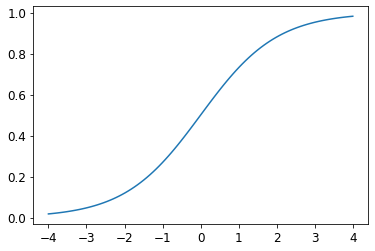

In [112]:
# Plotting a sofmtax function 
plot_function(torch.sigmoid , min= -4 , max = 4)

**Why can't we plot a softmax function?**

Because it has more than 1 dimensions and anything more than 2 dimensions are hard to interpret for a human eyes. 
https://datascience.stackexchange.com/questions/57005/why-there-is-no-exact-picture-of-softmax-activation-function

In our case we have 37 categories in our target, that means we will need more activation than a single column (sigmoid) by that we need an **activation per category**. 

Before we predicted between a 3 and 7, that returns two activations one for each class. Let's recreate the scenario using pytorch and examine. 

In [113]:
# Set the seed 
torch.random.manual_seed(42);

# Activations of 3s and 7s
acts = torch.randn((6 , 2)) * 2
acts 

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [114]:
# Adding should return 1
0.6734+ 0.2576

0.931

We can't take the sigmoid directly, since we dont get rows than add to 1. 

**We want the probability of being a 3 plus the prob of being a 7 add upto 1.**

In [115]:
# Represent in a dataframe 
import pandas as pd 
acts_np = acts.numpy()
acts_df = pd.DataFrame(acts_np)

# Renaming columns to 3 and 7 
acts_df = acts_df.rename(columns= {0: '3s' , 1: '7s'})
acts_df

,3s,7s
0,0.673381,0.257619
1,0.468925,0.460666
2,-2.245713,-0.372657
3,4.416403,-1.275994
4,0.923314,0.534702
5,1.069809,1.618714


In [116]:
# Applyin sigmoid for the sake 
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

- In previous example, we got **single activation per image** (asum: pred_probs) and which we have passed through the sigmoid function and it **represented the model confidence that the input was a 3.** 
- We didn't had two pred probs whether it's a 3 or not, instead we had only one pred probs defining the confidence of 3. 
- In this case we have two categories, and the **single pair of activations** indicate the *relative confidence* of the input being a 3 versus being a 7. 

> Note: In here, **we don't care whether they both are high or both are low, all that matters is which is higher and by how much.**

And yeah, we can do the same thing like we did before by applying the sigmoid directly on the two-activations version of our neural network.

By just taking the **difference between the neural net activations**, because that reflects how much more we are sure of the input being a 3 than a 7.

In [117]:
# Difference between our activation function 
acts[:, 0] - acts[: , 1]

tensor([ 0.4158,  0.0083, -1.8731,  5.6924,  0.3886, -0.5489])

In [118]:
prob_3 = (acts[: , 0] - acts[: , 1]).sigmoid() 
prob_3

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

Above is the confidence of being a 3 than 7. Now to find the probability of being a 7 we just need to subtract the `prob_3` with 1. 

In [119]:
prob_7 = 1 - prob_3
prob_7 

tensor([0.3975, 0.4979, 0.8668, 0.0034, 0.4041, 0.6339])

In [120]:
# Proper probability dataframe  
prob_df = pd.DataFrame({"3s": prob_3 , '7s': prob_7 })
prob_df

,3s,7s
0,0.602469,0.397531
1,0.502065,0.497935
2,0.133188,0.866812
3,0.996640,0.003360
4,0.595949,0.404051
5,0.366118,0.633882


We did the above for two categories now we gotta do the same stuff for more than 2 categories, thats why we use **softmax**. 

> **Jargon**: Exponential function (exp): Literally defined as e**x, where e is a special number approximately equal to 2.718. It is the inverse of the natural logarithm function. Note that exp is always positive, and it increases very rapidly!

In [121]:
# Softmax activations 
sm_acts = torch.softmax(acts , dim = 1)
sm_acts 

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

- Above at first it will apply the sigmoid for the first column, and those values subtracted from 1 for the second column. 
- `softmax` is the **multi-category equivalent of `sigmoid`** and we use this anytime when we have more than two categories and the probabilities of the categories should add upto 1. 

**How exponential helps in softmax** 

If one of the numbers in our activations *x* is slightly bigger than the others, the exponential will amplify, which means that in softmax, that number will be close to 1. 

Intuitively, the softmax function really wants to pick one class among the others, so its ideal for training a classifier when we know each picture has a definite label.

But at times when our model can't recognize any of the classes that it has seen during training, the goal is not to pick a class because it has a slightly bigger activation score then it would be less ideal.

In this case we might train a model using multiple binary output columns, each using sigmoid function. For instance,

- Is it Teddy Bear or not.
- Is it Grizzly Bear or not.
- Is it Brown bear or not.

Softmax is the first part of the `cross-entropy loss` the second part is log likelihood.


Important links 
 https://stats.stackexchange.com/questions/318520/many-binary-classifiers-vs-single-multiclass-classifier



In [122]:
print("hello world")

hello world


#### Log Likelihood 

- Just as we moved from sigmoid to softmax, we need to extend our loss function to work with more than just binary classification, where it **needs to be able to classify any number of categories**.
- Our activations, after softmax, are between 0 and 1, and sum to 1 for each row in the batch of predictions. Our targets are integers between 0 and 36.
- 

In [123]:
# Dummy targets 
targ = tensor([0,1,0,1,1,0])

# Softmax activations 
sm_acts

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [124]:
# Indexing into the softmax activation (pred_probs) using the targets 
idx = range(6) # Helps to iterate to samples 
sm_acts[idx , targ]

tensor([0.6025, 0.4979, 0.1332, 0.0034, 0.4041, 0.3661])


To see exactly what's happening here, let's put all the columns together in a table. Here, the first two columns are our activations, then we have the targets, the row index, and finally the result shown immediately above:



In [125]:
from IPython.display import HTML
df = pd.DataFrame(sm_acts, columns=["3","7"])
df['targ'] = targ
df['idx'] = idx
df['loss'] = sm_acts[range(6), targ]

df

,3,7,targ,idx,loss
0,0.602469,0.397531,0,0,0.602469
1,0.502065,0.497935,1,1,0.497935
2,0.133188,0.866811,0,2,0.133188
3,0.996640,0.003360,1,3,0.003360
4,0.595949,0.404051,1,4,0.404051
5,0.366118,0.633882,0,5,0.366118


- We can calculate the final column `loss` by taking the targ and idx columns as indices into a two-column matrix containing the 3 and 7 columns --> `sm_acts[idx , targ]`. 
- This works well even for more than 2 columns (3s and 7s). 

Activations --> prediction probabilities 

If its for our pet breeds classification with 37 categories, then there would be 37 activation columns and then a target containing number from 0 to 9. As long as the activation columns sum to 1, we will have a low functon that shows how well we're predicitng the pet breeds.

> **Note :** We just have to calculate the loss only from the column containing the correct label and we don't need to consider the other columns. This is because while using softmax, they add upto 1 minus the activation corresponding to the correct label. 

**Making activations for the correct label as high as possible must mean we're also decreasing activations of the remaining columns** 

Well the work of decreasing the activations can be done by a Pytorch function which exactly does the same (decreasing the activations for the remaining columns out there) and make sure assigning high activations for correct label. Its called nll_loss (nll --> Negative log likelihood).



The negative log-likelihood becomes unhappy at smaller values, where it can reach infinite unhappiness (that’s too sad), and becomes less unhappy at larger values. Because we are summing the loss function to all the correct classes, what’s actually happening is that whenever the network assigns high confidence at the correct class, the unhappiness is low, but when the network assigns low confidence at the correct class, the unhappiness is high.

In short, nll will reduce the loss the more correct class predicted and the loss will increase for incorrectly predicted classes.   


[Great read](https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/#:~:text=Negative%20Log%2DLikelihood%20(NLL),-In%20practice%2C%20the&text=We%20can%20interpret%20the%20loss,to%20make%20our%20models%20happy.&text=is%200%2C%20and%20reaches%200%20when%20input%20is%201.) 

In [126]:
# How nll loss works 
-sm_acts[idx , targ]

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

In [127]:
# Using the nll loss 
F.nll_loss(sm_acts , targ , reduction = "none")

tensor([-0.6025, -0.4979, -0.1332, -0.0034, -0.4041, -0.3661])

Despite the name it wont take the log. 

https://stats.stackexchange.com/questions/366312/why-we-use-log-function-for-cross-entropy

#### Taking the log 
The negative log liklehood function works quite well as a loss function but we can make it a bit better by using log.

Our Cross entropy loss function till now has a softmax activation function and negative log likelihood function but to make this more efficient we need to get the help of a log function. 

Our predictions are in the form of probabilties and probs can't be smaller than 0 or greater than 1. It means our **model will not care if it predicts 0.99 or 0.99** and indeed those numbers are very close together, but in other sense **0.999 is 10 times more confident than 0.99**

Nowe we want to transform our numbers between 0 and 1 instead between negative infinity and positive infinity for this reason we use **logarithm** (log). 

```
log(a * b) = log(a) + log(b) 
```

The above can eqn help us in the modification, which can create really , really **large and really, really small numbers can be replaced by addition, which is much likely to result in scaled that are difficult for our computers to handle.**

Taking the mean of the positive or negative log of our probabilities (depending on correct or incorrect class) given us the negative log likelihood. 

`nll_loss` in Pytorch assumes you have already taken a log of the softmax activations. 

**Putting together**
- First we take the softmax 
- Then the log likelihood of that softmax function 

And the above two combination is called `cross_entropy` loss in Pytorch. 

`nn.CrossEntropyLoss` --> `log_softmax` + `nll_loss` 



In [128]:
# Cross entropy loss functio 
loss_func = nn.CrossEntropyLoss() 

In [129]:
# Now we can use this function (Pass a prediction and targets)
loss_func(acts , targ)

tensor(1.8045)

All Pytorch functions, are provided in two forms,

- CrossEntropyLoss() a class form
- F.cross_entropy() a functional one with the F namespace.

Most **people tend to use the Pytorch's version** which is the class form.

By default Pytorch loss function take the mean of the loss of all items, we can use reduction = 'none' to disable this from happening. Rather a scalar we will get a list of tensor.

Loss function ---> A loss function gives a number on how well or badly our model is doing, but it does nothing to help us make it any good. 


### Model Interpretation 
- It's very hard to interpret loss functions directly, because they are designed to be things computer can differentiate and optimize. 
- For us humans, we have something called metrics, these are not used in the optimization process but just to help us poor humans understand what is going on. 


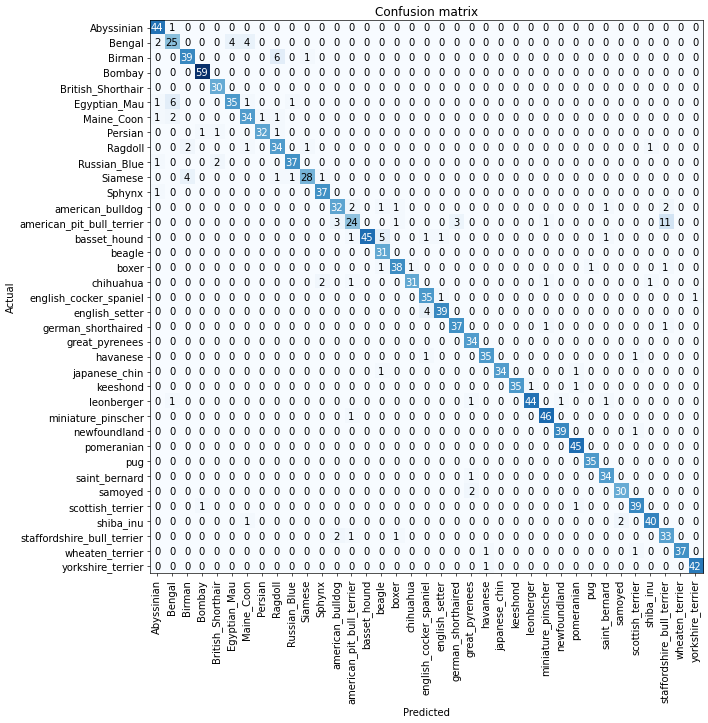

In [130]:
# Plotting a confusion matrix 
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize = (12 , 12), dpi = 60)

Though it looks good for our sight, but it's very hard to grab the important information from this plot. 

Soo we can use `most_confused` method, which just shows the cells of the confusion matrix with the most incorrect prediction. 

In [131]:
# Getting the text format confusion 
interp.most_confused(min_val = 5) 

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 11),
 ('Birman', 'Ragdoll', 6),
 ('Egyptian_Mau', 'Bengal', 6),
 ('basset_hound', 'beagle', 5)]

Great, we've got a good baseline and in upcoming steps will see ways to improve it. 

### Improve Our Model 
- From now on we will look at a range of techniques to improve the training of our model annd make it better.
- **Things like transfer learning, how to fine-tune a pretrained model without breaking the pretrained weights.**


#### Learning Rate Finder 
- While training a model gotta make sure that we have the right learning rate. 
- If the learning rate is too low, it can take many, many epochs to train ur model. 
- For every epoch we are letting our model/learner to do a complete pass through the data. 

Let's train our model with a higher learning rate and see what happens. 

In [132]:
# Training the model with higher learning rate 
learn = cnn_learner(dls, resnet34 , metrics = error_rate)

# With higher learning rate 
learn.fine_tune(1 , base_lr = 0.1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.648472,2.595624,0.354533,01:09


epoch,train_loss,valid_loss,error_rate,time
0,3.931820,2.656162,0.717862,01:14


We can clearly observe that our `error_rate` is pretty high, what happened? 
- Well our optimizer stepped in the correct direction, but it stepped so far that it totally overshot the minimum loss. 
- So repeating this step again and again made the loss getting further and further away, and we want it to be closer. 


**How this mechanism works?**
- We use one-mini batch and calculate the losses and increase the learning rate by some percentage, then we get another mini-batch, track the loss and double the learning rate again. 
- We will keep doing this until the loss gets worse, and this is the point where we know we have gone too far. 

- Start with a very very small learning rate, something so small that we would never expect it to be too big to handle. And we use that for **one mini-batch** find what's the loss for it that mini-batch set.
- And then increase the learning rate by a certain percentage, then we train it on another mini-batch and track the loss and double the learning rate again. We will keep doing this until the loss gets worse oh yeah worse not better.

- **One order of magnitude less than where the minimum loss was achieved (i.e., the minimum divided by 10)**
- **The last point where the loss was clearly decreasing**


**Finding the ideal learning rate and why it's important** 
In short, a bad learning rate means bad performance. 
- *Learning too slowly*: If the learning rate is too small it will take a really long time to train your model. This can mean that to get a model of the same accuracy, you either would need to spend more time or more money. Said another way, it will either take longer to train the model using the same hardware or you will need more expensive hardware (or some combination of the two).

- *Learning too quickly*: If the learning rate is too large, the steps it takes will be so big it overshoots what is an optimal model. Quite simply your accuracy will just bounce all over the place rather than steadily improving.

We can use something called a **learning rate finder** that will help us in finding the ideal learning rate, though it just plots graph btw your loss and learning we should be wise and choose the righht one. 

If suggestion is set to True, the `lr_find` will return two values they are `lr_min` and `lr_steep`, anywhere in that range will be a good guess for a starting learning rate. 


The default learning rate is **1e-3**. 



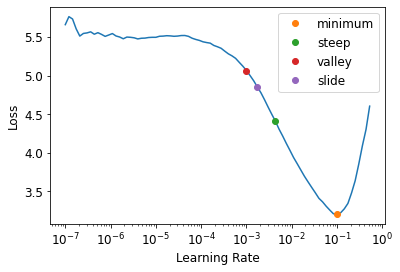

In [133]:
learn = cnn_learner(dls , resnet34 , metrics = error_rate)

# Using the learning rate finder and getting two imp values from it 
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [134]:
print(f"Minimum/10: {lrs.minimum:.2e}, steepest point: {lrs.steep:.2e} , Valley: {lrs.valley}")

Minimum/10: 1.00e-02, steepest point: 4.37e-03 , Valley: 0.0010000000474974513


It seems the new updated `lr_find` valley is happen to give good results than the `minimum` and `steep`. 

Let's train with the valley and see if it improves the model's performance. 

In [135]:
# What's our valley
lrs.valley 

tensor(0.0010)

In [136]:
# Training the model with the valley 
learn.fine_tune(2 , base_lr = lrs.valley)

epoch,train_loss,valid_loss,error_rate,time
0,2.067667,0.397632,0.122463,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.569227,0.251346,0.085250,01:13
1,0.397380,0.216750,0.071719,01:14


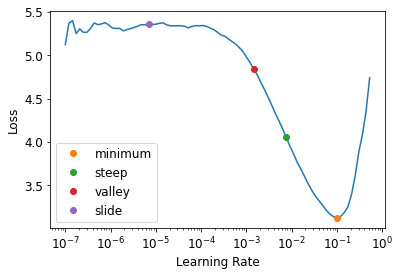

In [137]:
learn = cnn_learner(dls , resnet34 , metrics = error_rate)

# Using the learning rate finder and getting two imp values from it 
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [138]:
lrs.valley , lrs.steep  

(tensor(0.0014), 0.007585775572806597)

In [139]:
# Now choosing a value between valley and steep 
learn.fine_tune(2 , base_lr = 2e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.540739,0.335134,0.110961,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.524739,0.345069,0.107578,01:14
1,0.333152,0.216409,0.070365,01:13


#### Unfreezing and Transfer Learning 
- A cnn consists of many linear layers with a non-linear activation function between each pair, followed by one or more final linear layers with an activation function such as softmax at the very end.

In transfer learning the final layer is unlikely to be any use for us, because it is designed to classify the categories in the original pretraining dataset.

Important read: https://arxiv.org/pdf/1311.2901.pdf

**So when we do transfer learning we remove it, throw it away, and replace it with a new linear layer with the correct number of outputs for our desired task (in this case, there would be 37 activations).**

- The newly added final linear layer will have entirely random weights. 
- All of the layers prior to the final layer are carefully trained to be good at image classification tasks in general (ImageNet). 

We want to train a model in such a way that we allow it to remember all of these generally useful ideas from the pretrained model, use them to solve our particular task (classify pet breeds), and only adjust them as required for the specifics of our particular task (replace the last layer).

https://forums.fast.ai/t/understanding-fine-tuning/54142

When we create a model from a **pretrained network fastai automatically freezes all of the pretrained layers for us**. When we call the **fine_tune** method fastai does two things:

- Trains the randomly added layers for one epoch, with all other layers frozen.
- Unfreezes all of the layers, and trains them all for the number of epochs requested. 

The fine_tune method has a number of parameters you can use to change its behavior, but it might be easiest for you to just call the underlying methods directly if you want to get some custom behavior. Remember that you can see the source code for the method


`fit_one_cycle` --> Does everything manually, at first our learner will be freezed except the last final activation layer (Output layer).

https://forums.fast.ai/t/what-is-a-better-work-flow-with-fit-one-cycle/42302


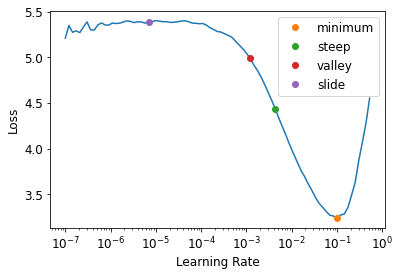

In [140]:
# Creating a learner and using fit_one_cycle for 3 epochs at the output layer 
learn = cnn_learner(dls , resnet34 , metrics = error_rate)

# Learning rate 
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [141]:
lrs.valley

tensor(0.0012)

In [142]:
# Using the fit_one_cycle 
learn.fit_one_cycle(3 , 0.0014)

epoch,train_loss,valid_loss,error_rate,time
0,1.541184,0.296677,0.095399,01:10
1,0.598078,0.228339,0.073072,01:09
2,0.405913,0.216153,0.068336,01:09


In [143]:
# Unfreeze the model 
learn.unfreeze()

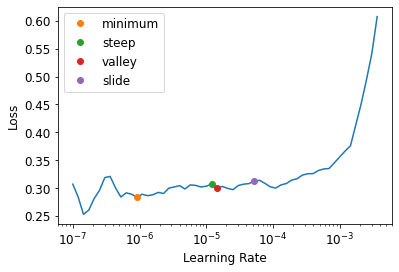

In [144]:
# Learning rate finder 
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [145]:
# Training the whole model
learn.fit_one_cycle(5 , lr_max= lrs.valley.item())

epoch,train_loss,valid_loss,error_rate,time
0,0.317345,0.198655,0.060893,01:13
1,0.308797,0.193473,0.064276,01:14
2,0.272243,0.181626,0.056157,01:13
3,0.236047,0.181357,0.060217,01:14
4,0.228107,0.177130,0.058863,01:14


In [148]:
lrs.valley.item()

1.4454397387453355e-05

#### Discriminative Learning Rates 
Well, the above results were good but we can do more. The deepest layer of our pre-trained model might not need as high a learning as the last ones. 
**The idea is use different learning rate for different layers**. 

paper: https://arxiv.org/abs/1801.06146v5

- Eventhough after we unfreeze, we still care a lot about the quality of those pre-trained weights. 
- fastai lets you pass a Python `slice` object anywhere that a learning rate is expected (except fine_tune). 
- The **first value** passed will be the learning rate in the earliest layer of the neural network. 
- The **second value** will be the learning rate in the final layer. 
- The learning rates between will have learning rates that are  multiplicatively equidistant throughout that range. 

In below example we will set the lowest layer of our neural net as (min) `1e-6` and other layers will scale upto `1e-4` (max).

I am gonna try two methods that is, 
-  find learnin rate before everytime I fit the model. 
- Fit the freezed model with the default lr rate and find the learning rate only after unfreezing all the layers. 

**Idk how this is gonna help, since I am curious about how this might work lemme try** 


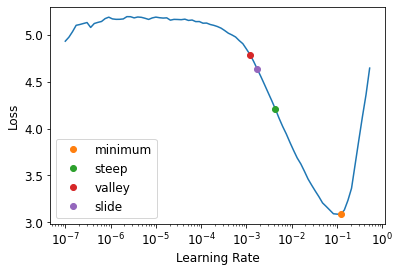

In [150]:
# Creating a new learner 
lr_learn_dis = cnn_learner(dls , resnet34 , metrics= error_rate)

# Finding the learning rate
lrs = lr_learn_dis.lr_find(suggest_funcs=(minimum , steep, valley , slide))

In [151]:
# Fitting for 3 cycles (ranging btw --> valley to slide)
lr_learn_dis.fit_one_cycle(3 , lr_max = slice(lrs.valley.item() , lrs.slide.item()))

epoch,train_loss,valid_loss,error_rate,time
0,1.308750,0.278391,0.088633,01:10
1,0.554311,0.219073,0.064276,01:09
2,0.350772,0.205196,0.060893,01:09


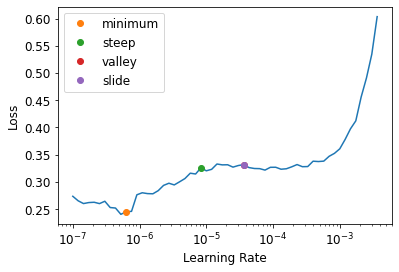

In [152]:
# Unfreeze the model 
lr_learn_dis.unfreeze()

# Finding the learning rates again 
lrs = lr_learn_dis.lr_find(suggest_funcs=(minimum , steep, valley , slide))

In [156]:
# Fitting the model for 6 epochs, ranging --> (steep to slide)
# The reason is because both valley and slide are the same here 

lr_learn_dis.fit_one_cycle(6 , lr_max = slice(lrs.steep , lrs.slide))

epoch,train_loss,valid_loss,error_rate,time
0,0.285609,0.199573,0.063599,01:15
1,0.284252,0.193374,0.058187,01:14
2,0.256365,0.194067,0.057510,01:14
3,0.217253,0.178443,0.050744,01:14
4,0.197920,0.178737,0.050068,01:14
5,0.184963,0.180705,0.050744,01:14


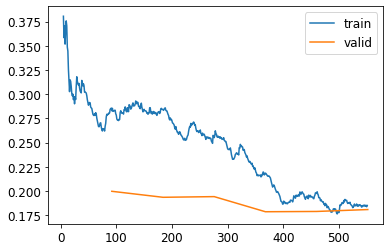

In [157]:
# Plotting our training and validation loss 
lr_learn_dis.recorder.plot_loss()

Here there is no sign of overfitting that much, but anyways what does it mean? 
- Overfitting is the sign where your model is becoming overconfident of it's predictions. 
- Though we have good accuracy and even the accuracy might improve, but the validation loss will get worse...
- But we should keep an eye out on other metrics too.

#### Selecting the Number of Epochs 
- At first, pick a number of epochs that will train in the amount of time that you are happy to wait for. 
- Then observe training and validation loss plots, and your metrics. 
- If you see there is a chance your model is getting better even in the final epochs, then you know that you haven't trained it for too long. 

**Remember, it's not just that we're looking for the validation loss to get worse, but the actual metrics. Your validation loss will first get worse during training because the model gets overconfident, and only later will get worse because it is incorrectly memorizing the data.** 

> Remember, our loss function is just something that we use to allow our optimizer to have something it can differentiate and optimize; it's not actually the thing we care about in practice

- Therefore, if you find that you have overfit, what you should actually do is retrain your model from scratch, and this time select a total number of epochs based on where your previous best results were found. 
- If you have the time to train for more epochs, you may want to instead use that time to train more parameters—that is, use a deeper architecture.

#### Deeper Architectures 
In general, a model with more parameters can model your data more accurately. 

For instance, the ResNet architecture that we are using in this chapter comes in variants with 18, 34, 50, 101, and 152 layer, pretrained on ImageNet. A larger (more layers and parameters; sometimes described as the "capacity" of a model) version of a ResNet will always be able to give us a better training loss, **but it can suffer more from overfitting**, because it has more **parameters to overfit** with.

In general, a **bigger model has the ability to better capture the real underlying relationships in your data**, and also to capture and memorize the specific details of your individual images.

The other downside of deeper architectures is that they take quite a bit longer to train. One technique that can speed things up a lot is mixed-precision training. This refers to using less-precise numbers (half-precision floating point, also called fp16) where possible during training.







In [158]:
!nvidia-smi

Sat Jul  3 12:37:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |   5002MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [159]:
# Using the mixed precision 
from fastai.callback.fp16 import * 
learn_mix = cnn_learner(dls , resnet50 , metrics= [error_rate, accuracy]).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


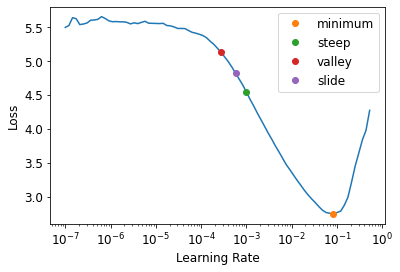

In [161]:
# Finding the learning rate 
lrs = learn_mix.lr_find(suggest_funcs=(minimum , steep , valley , slide))

In [166]:
# Fitting for 3 cycles 
learn_mix.fit_one_cycle(3 , lr_max = slice(lrs.valley.item() , lrs.steep) )

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.063359,0.246043,0.082544,0.917456,01:06
1,0.462226,0.188223,0.061570,0.938430,01:06
2,0.288416,0.182063,0.056157,0.943843,01:06


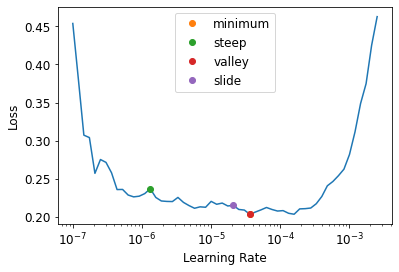

In [167]:
# Unfreezing the model 
learn_mix.unfreeze() 

# Finding the learning rate 
lrs = learn_mix.lr_find(suggest_funcs=(minimum , steep , valley , slide))

In [168]:
# Fitting the model for 5 epochs 
learn_mix.fit_one_cycle(5 , lr_max = slice(lrs.slide.item() , lrs.valley.item()))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.215768,0.177921,0.058187,0.941813,01:07
1,0.215253,0.170493,0.055480,0.944520,01:07
2,0.168768,0.158731,0.051421,0.948579,01:07
3,0.134414,0.156501,0.048038,0.951962,01:07
4,0.115264,0.151724,0.048714,0.951286,01:07


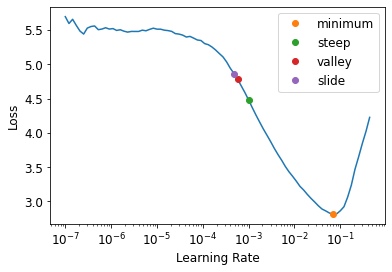

In [169]:
# Training a model with fine_tune (free_epochs)
learn = cnn_learner(dls , resnet50 , metrics = [error_rate , accuracy]).to_fp16()

# Finding the learning rate 
lrs = learn.lr_find(suggest_funcs= (minimum , steep , valley , slide))

In [170]:
# Fine tuning the model 
learn.fine_tune(8 , freeze_epochs= 2 , base_lr = lrs.valley.item())

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.072903,0.367591,0.117050,0.882950,01:05
1,0.758686,0.239569,0.078484,0.921516,01:05


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.370107,0.196899,0.063599,0.936401,01:07
1,0.306825,0.191341,0.065629,0.934371,01:07
2,0.257783,0.192836,0.063599,0.936401,01:07
3,0.180913,0.189720,0.058187,0.941813,01:07
4,0.140153,0.187112,0.052097,0.947903,01:09
5,0.103345,0.173316,0.050068,0.949932,01:08
6,0.078965,0.168459,0.047361,0.952639,01:07
7,0.074006,0.173494,0.050744,0.949256,01:07
